In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import files
uploaded = files.upload()


Saving sales_data.csv to sales_data.csv


In [6]:
df = pd.read_csv('sales_data.csv')


In [7]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Order ID    300 non-null    int64 
 1   Order Date  300 non-null    object
 2   Customer    300 non-null    object
 3   Product     300 non-null    object
 4   Category    300 non-null    object
 5   Quantity    300 non-null    int64 
 6   Unit Price  300 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 16.5+ KB


,Order ID,Quantity,Unit Price
count,300.000000,300.000000,300.000000
mean,1150.500000,3.076667,25706.840000
std,86.746758,1.408570,13860.568619
min,1001.000000,1.000000,1096.000000
25%,1075.750000,2.000000,14378.750000
50%,1150.500000,3.000000,26060.500000
75%,1225.250000,4.000000,37277.000000
max,1300.000000,5.000000,49823.000000


In [8]:
df.dropna(inplace=True)
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.strftime('%Y-%m')
df['Revenue'] = df['Quantity'] * df['Unit Price']


/tmp/ipython-input-9-3944553164.py:8: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


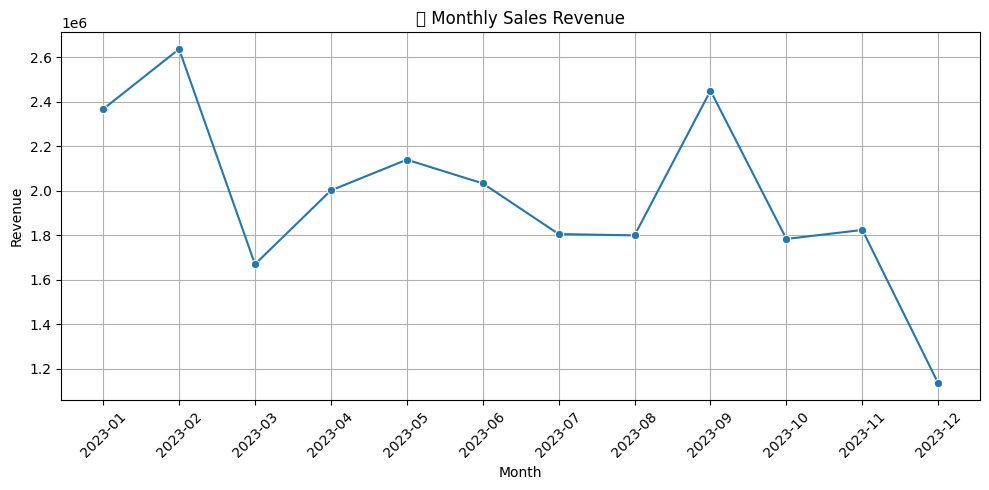

In [9]:
monthly_sales = df.groupby('Month')['Revenue'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_sales, x='Month', y='Revenue', marker='o')
plt.title('📊 Monthly Sales Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-10-3542224624.py:8: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


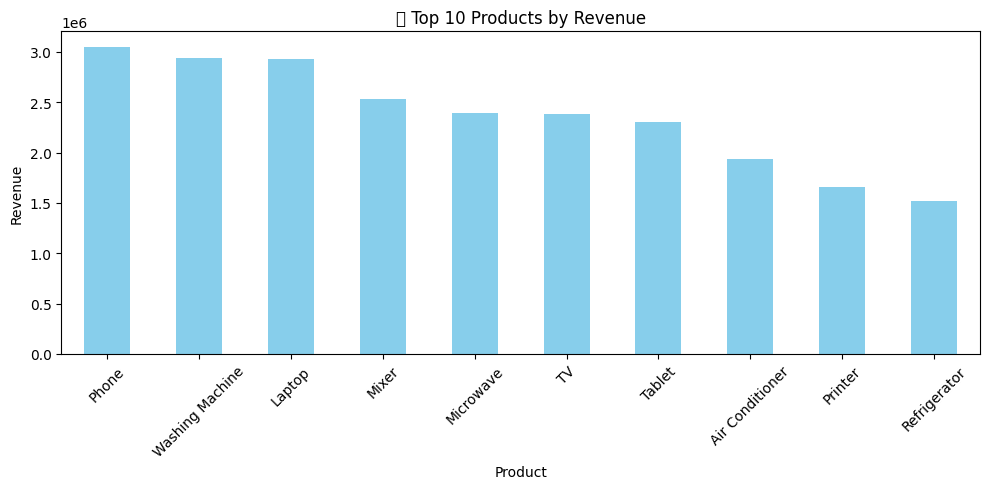

In [10]:
top_products = df.groupby('Product')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
top_products.plot(kind='bar', color='skyblue')
plt.title('🏆 Top 10 Products by Revenue')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-11-2978740918.py:8: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


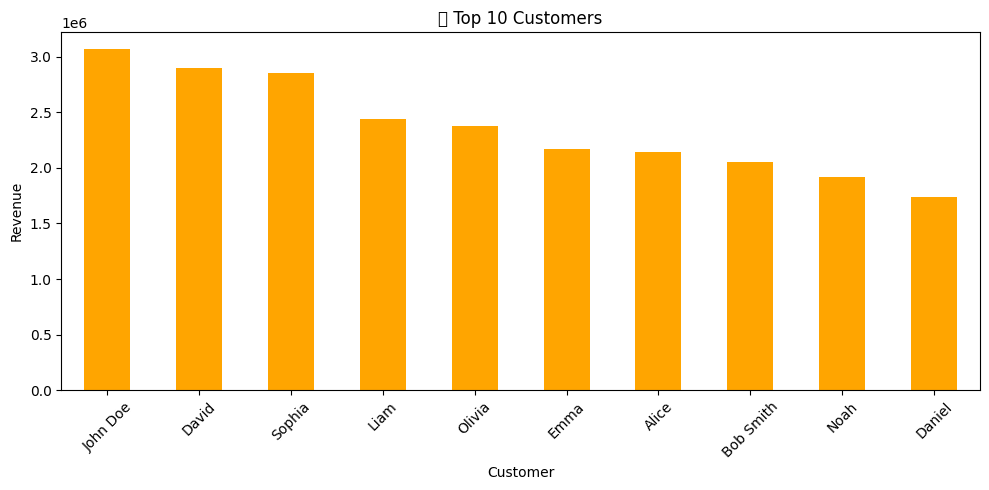

In [11]:
top_customers = df.groupby('Customer')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
top_customers.plot(kind='bar', color='orange')
plt.title('👥 Top 10 Customers')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-12-1808521711.py:7: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


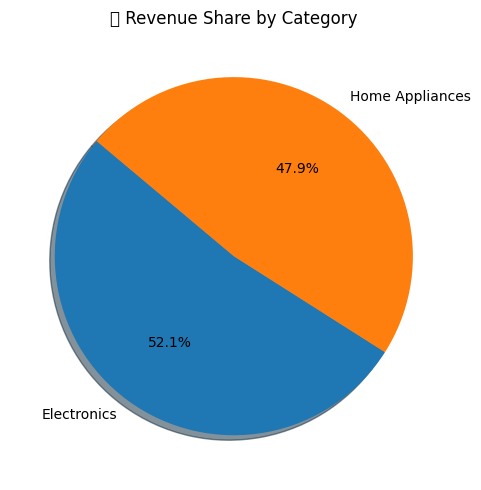

In [12]:
category_sales = df.groupby('Category')['Revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
category_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('📦 Revenue Share by Category')
plt.ylabel('')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


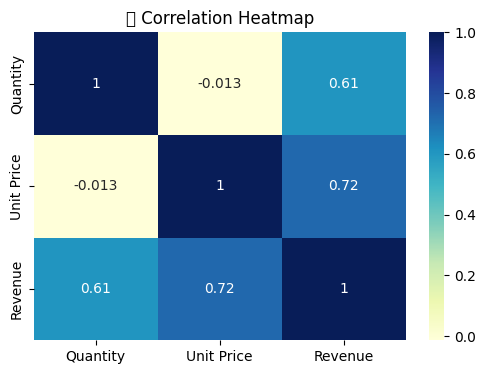

In [13]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[['Quantity', 'Unit Price', 'Revenue']].corr(), annot=True, cmap='YlGnBu')
plt.title('📈 Correlation Heatmap')
plt.show()